In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

ERROR: Could not find a version that satisfies the requirement scikit-pyplot (from versions: none)
ERROR: No matching distribution found for scikit-pyplot


In [ ]:
data=pd.read_csv('/content/Census Income Project.csv')

In [ ]:
data

Age          Workclass  Fnlwgt  ... Hours_per_week  Native_country  Income
0       50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
1       38            Private  215646  ...             40   United-States   <=50K
2       53            Private  234721  ...             40   United-States   <=50K
3       28            Private  338409  ...             40            Cuba   <=50K
4       37            Private  284582  ...             40   United-States   <=50K
...    ...                ...     ...  ...            ...             ...     ...
32555   27            Private  257302  ...             38   United-States   <=50K
32556   40            Private  154374  ...             40   United-States    >50K
32557   58            Private  151910  ...             40   United-States   <=50K
32558   22            Private  201490  ...             20   United-States   <=50K
32559   52       Self-emp-inc  287927  ...             40   United-States    >50K

[32560 rows x 15 columns]

**Checking null values**

In [ ]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

*No null values are there*

In [ ]:
data.describe()

Age        Fnlwgt  ...  Capital_loss  Hours_per_week
count  32560.000000  3.256000e+04  ...  32560.000000    32560.000000
mean      38.581634  1.897818e+05  ...     87.306511       40.437469
std       13.640642  1.055498e+05  ...    402.966116       12.347618
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.178315e+05  ...      0.000000       40.000000
50%       37.000000  1.783630e+05  ...      0.000000       40.000000
75%       48.000000  2.370545e+05  ...      0.000000       45.000000
max       90.000000  1.484705e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.head()

Age          Workclass  Fnlwgt  ... Hours_per_week  Native_country  Income
0   50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
1   38            Private  215646  ...             40   United-States   <=50K
2   53            Private  234721  ...             40   United-States   <=50K
3   28            Private  338409  ...             40            Cuba   <=50K
4   37            Private  284582  ...             40   United-States   <=50K

[5 rows x 15 columns]

In [ ]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Education': 16,
 'Income': 2,
 'Marital_status': 7,
 'Native_country': 42,
 'Occupation': 15,
 'Race': 5,
 'Relationship': 6,
 'Sex': 2,
 'Workclass': 9}

**From above i can see every object column and how many unique value they have if any column was having all unique value i might be droped that column like id but here the maximun unique value that i can see is  'Native_country': 42**

In [ ]:
data.select_dtypes('object')

Workclass    Education  ...  Native_country  Income
0       Self-emp-not-inc    Bachelors  ...   United-States   <=50K
1                Private      HS-grad  ...   United-States   <=50K
2                Private         11th  ...   United-States   <=50K
3                Private    Bachelors  ...            Cuba   <=50K
4                Private      Masters  ...   United-States   <=50K
...                  ...          ...  ...             ...     ...
32555            Private   Assoc-acdm  ...   United-States   <=50K
32556            Private      HS-grad  ...   United-States    >50K
32557            Private      HS-grad  ...   United-States   <=50K
32558            Private      HS-grad  ...   United-States   <=50K
32559       Self-emp-inc      HS-grad  ...   United-States    >50K

[32560 rows x 9 columns]

In [ ]:
col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

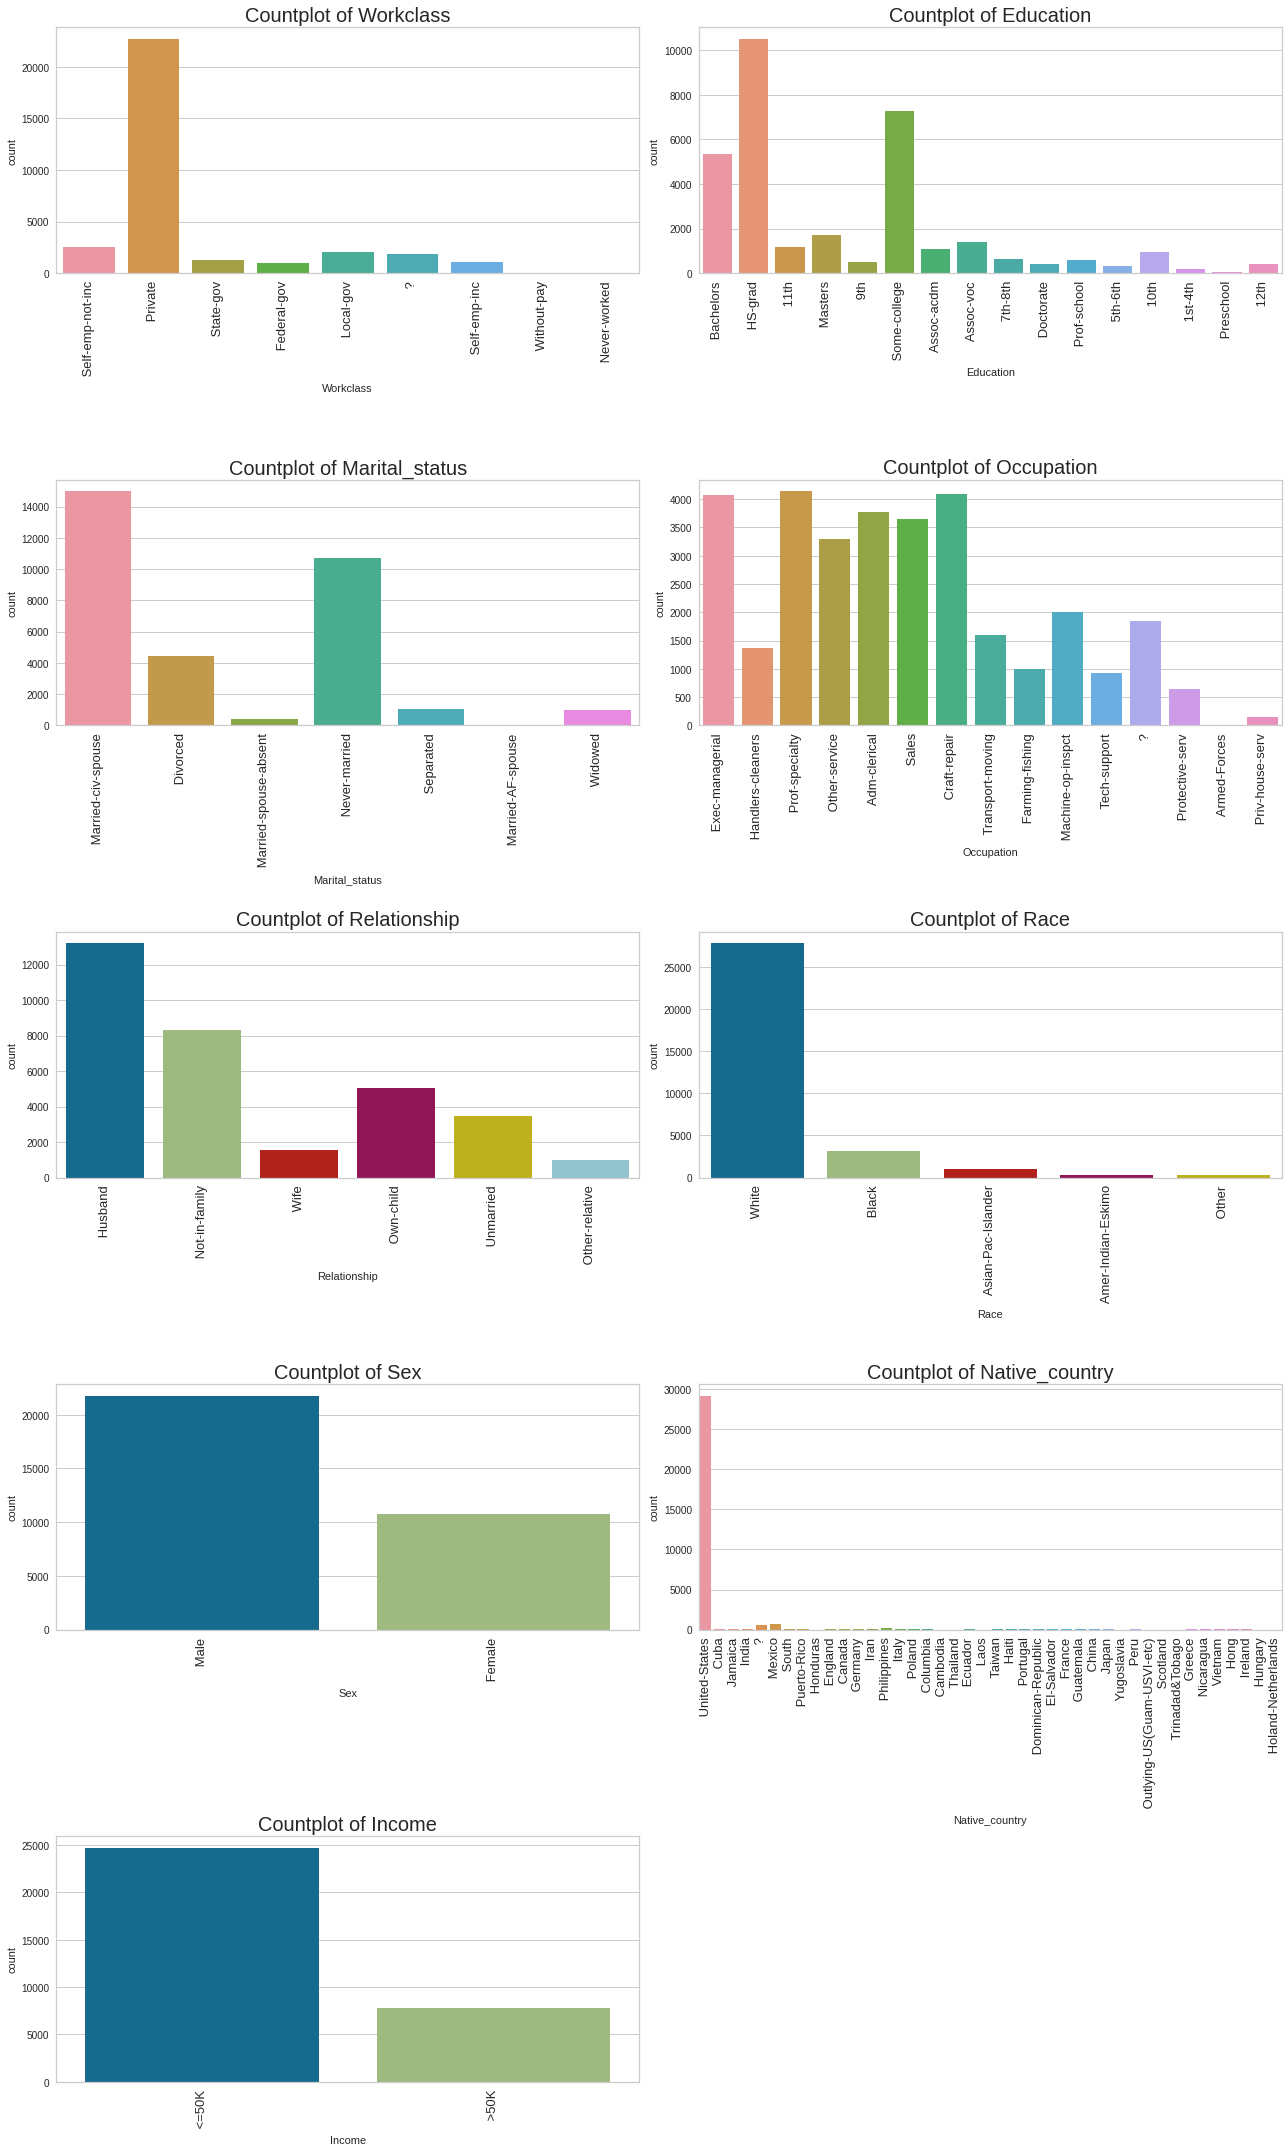

In [ ]:
plt.figure(figsize=(18,30))
for i in range(len(col)):
  plt.subplot(3,2,i+1)
  sns.countplot(data[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

#Observation
1-From workclass Private has the highest count and other 
 
 Private             22696
 
 Self-emp-not-inc     2541
 
 Local-gov            2093
 
 ?                    1836
 
 State-gov            1297
 
 Self-emp-inc         1116
 
 Federal-gov           960
 
 Without-pay            14
 
 Never-worked            7

2-From education the count of every class is
 
 HS-grad         10501
 
 Some-college     7291
 
 Bachelors        5354
 
 Masters          1723
 
 Assoc-voc        1382
 
 11th             1175
 
 Assoc-acdm       1067
 
 10th              933
 
 7th-8th           646
 
 Prof-school       576
 
 9th               514
 
 12th              433
 
 Doctorate         413
 
 5th-6th           333
 
 1st-4th           168
 
 Preschool          51

3-From marital_status i can say
 
 Married-civ-spouse       14976
 
 Never-married            10682
 
 Divorced                  4443
 
 Separated                 1025
 
 Widowed                    993
 
 Married-spouse-absent      418
 
 Married-AF-spouse           23

4-from occupation i can say
 
 Prof-specialty       4140
 
 Craft-repair         4099
 
 Exec-managerial      4066
 
 Adm-clerical         3769
 
 Sales                3650
 
 Other-service        3295
 
 Machine-op-inspct    2002
 
 ?                    1843
 
 Transport-moving     1597
 
 Handlers-cleaners    1370
 
 Farming-fishing       994
 
 Tech-support          928
 
 Protective-serv       649
 
 Priv-house-serv       149
 
 Armed-Forces            9

5- from relationship counplot i can say it has
 
 Husband           13193
 
 Not-in-family      8304
 
 Own-child          5068
 
 Unmarried          3446
 
 Wife               1568
 
 Other-relative      981

6-from race i can say it has 

 White                 27815
 
 Black                  3124
 
 Asian-Pac-Islander     1039
 
 Amer-Indian-Eskimo      311
 
 Other                   271

 7-From countplot of native_country i can say only US has the high and good count other are just have few count only

8-From sex i can say

 Male      21789
 
 Female    10771

 male are more

9-From income i can say

 <=50K    24719
 
>50K      7841

 more people are there who have income less then 50k

In [ ]:
data.select_dtypes(exclude='object')

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0       50   83311             13             0             0              13
1       38  215646              9             0             0              40
2       53  234721              7             0             0              40
3       28  338409             13             0             0              40
4       37  284582             14             0             0              40
...    ...     ...            ...           ...           ...             ...
32555   27  257302             12             0             0              38
32556   40  154374              9             0             0              40
32557   58  151910              9             0             0              40
32558   22  201490              9             0             0              20
32559   52  287927              9         15024             0              40

[32560 rows x 6 columns]

In [ ]:
col1=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

In [3]:
plt.figure(figsize=(25,15))
for i in range(len(col1)):
  plt.subplot(2,3,i+1)
  sns.distplot(data[col1[i]])
  plt.title(f"Distribution of {col1[i]}")
  plt.tight_layout()

NameError: name 'plt' is not defined

#Observation
1-only the value of fnlwgt is continuous so that distribution is right skewed so in right skewed we know mean>median>mode 

2-for other columns i can say they are discrete 

In [ ]:
col2=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']

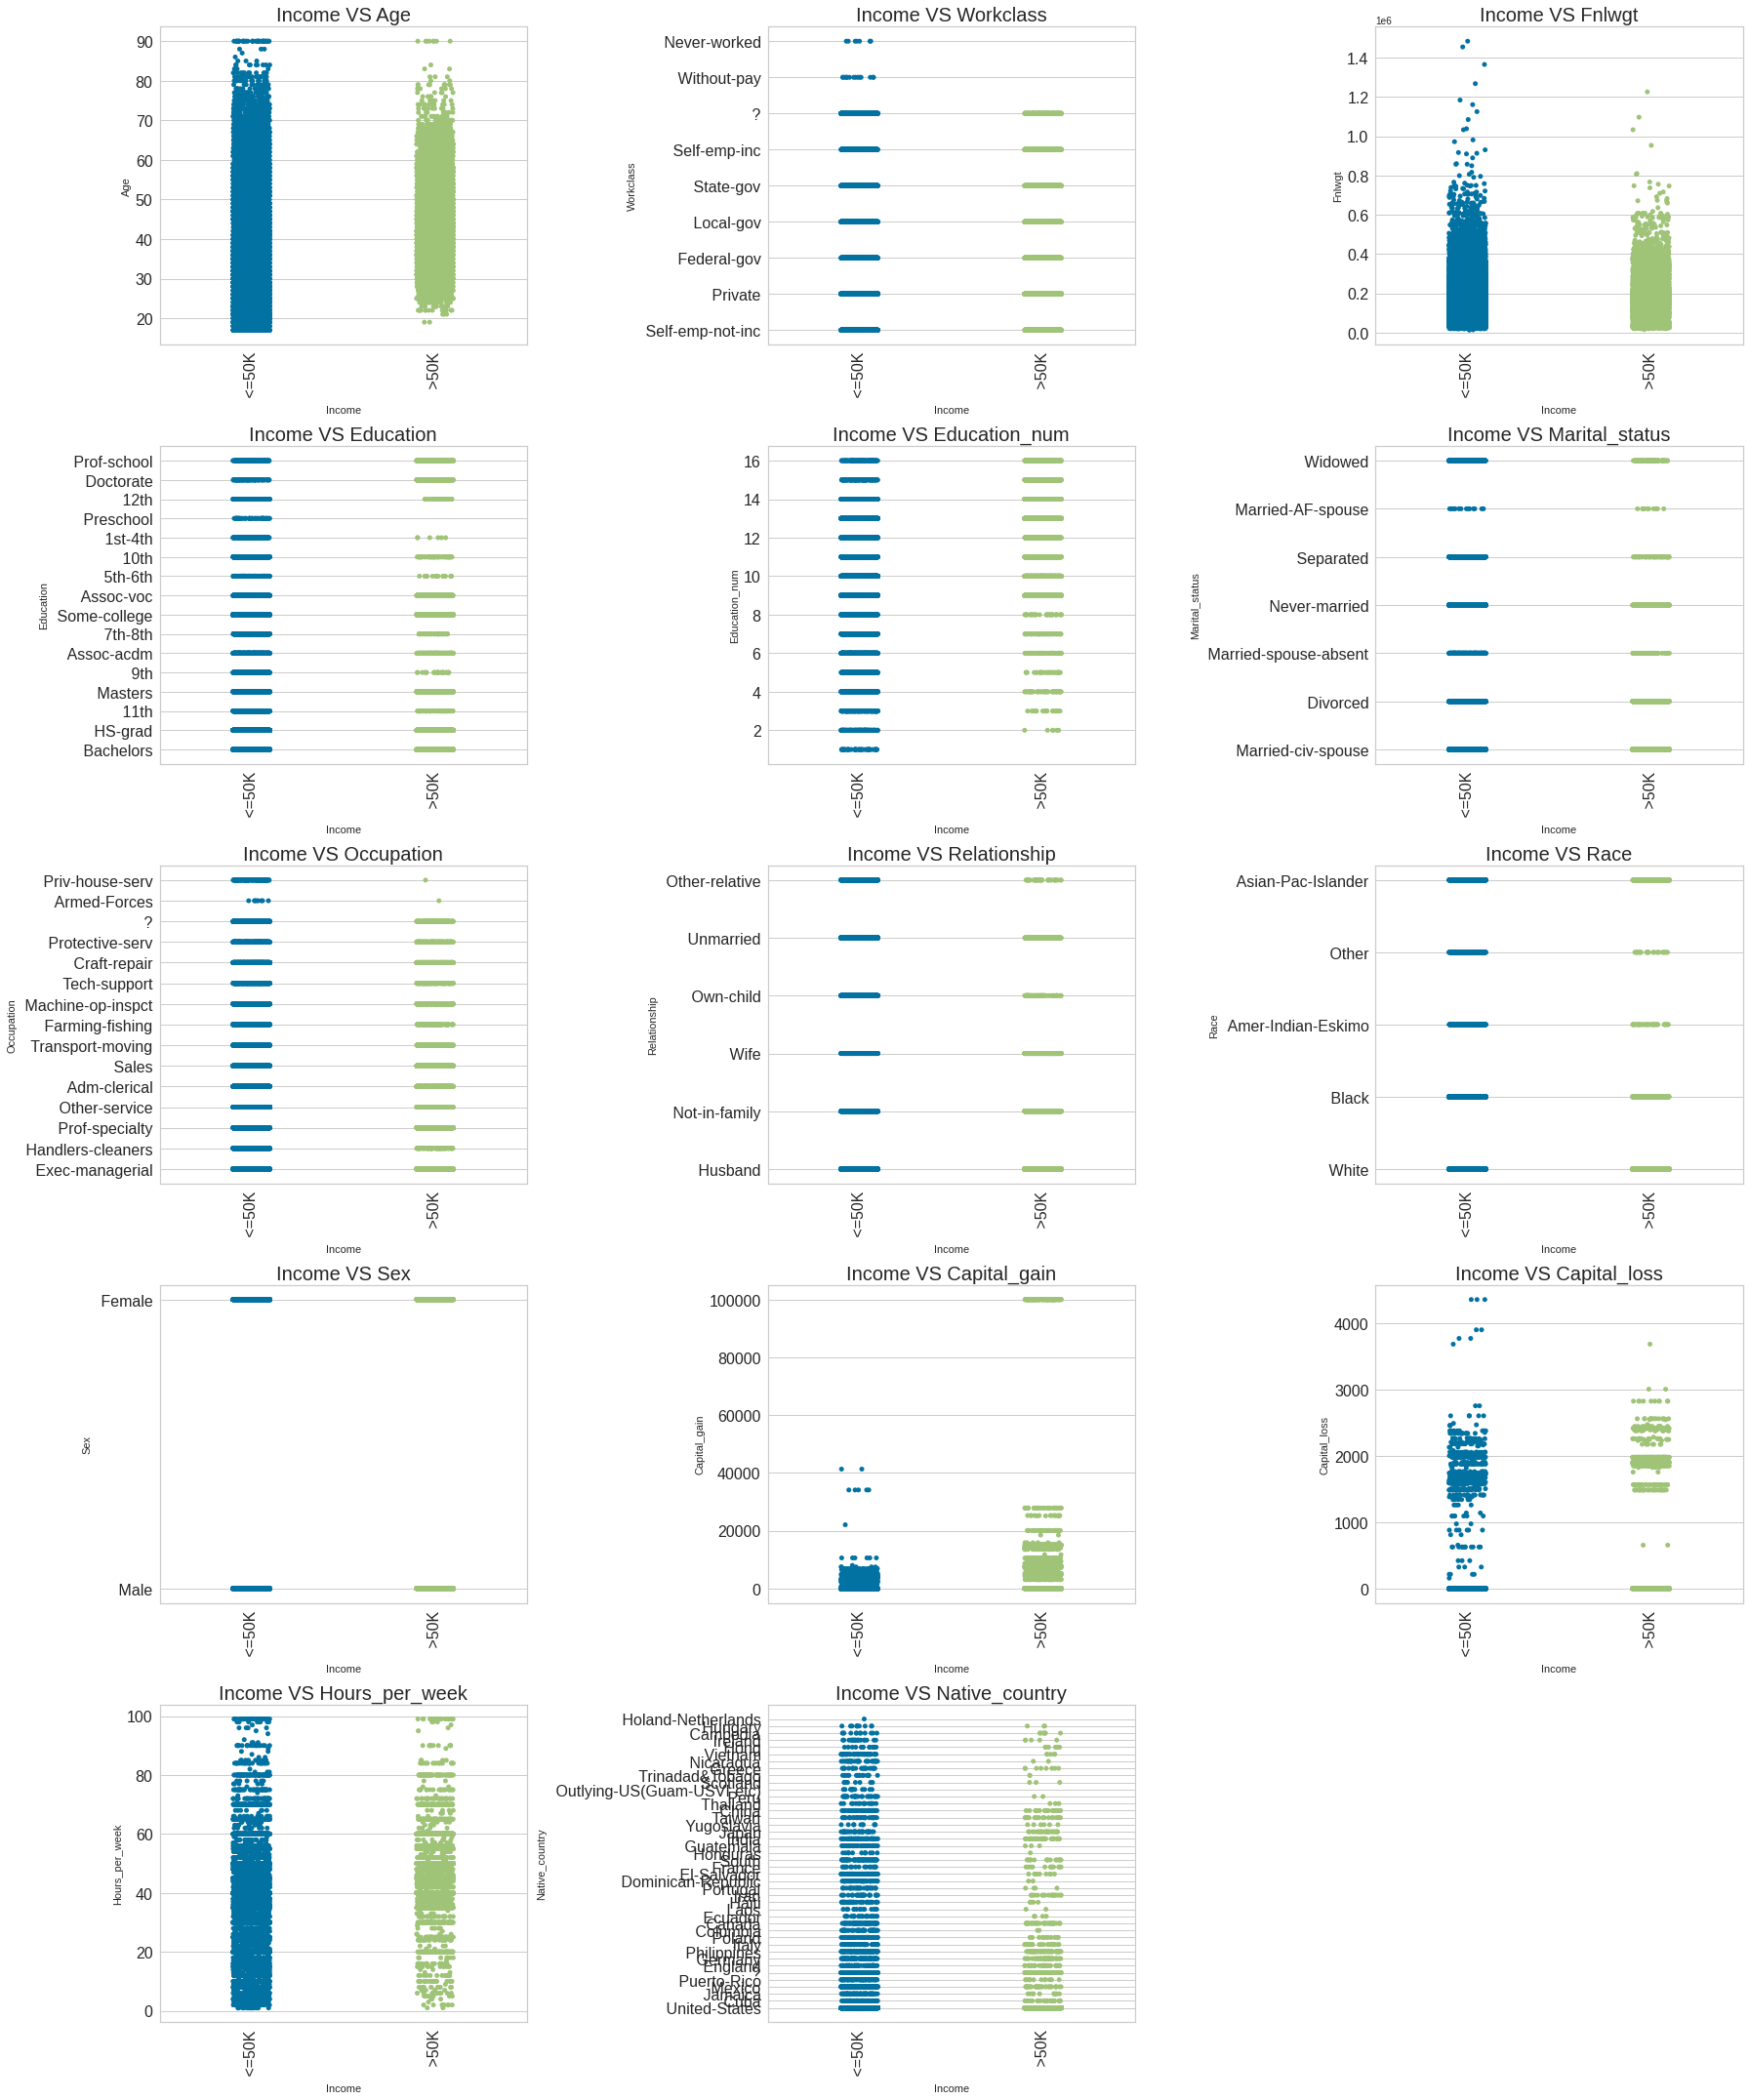

In [ ]:
plt.figure(figsize=(25,30))
for i in range(len(col2)):
  plt.subplot(5,3,i+1)
  sns.stripplot(x=data['Income'],y=data[col2[i]])
  plt.title(f"Income VS {col2[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

#Obseravtion
1-From age i can say from 25-65 people have high chances to get more then 50k

2-From workclass i can say except without pay and never worked other workclass have chances to earn more then 50k

3-From education i can say as the education increase there are more chances to earn more then 50k same with education_num

4-From marital status i can say except married af spouse all have chances to earn more then 50k

5-From occupation i can say as the occupation increase there are more chances to earn more then 50k

6-from relationship i can say there is no such effect of relationship on income same with SEX

7-From capital gain i can say more the capital income more chances to earn more then 50k

8-From capital loss i can say less the capital loss more the income

9-for last two plot i plot them again to understand them

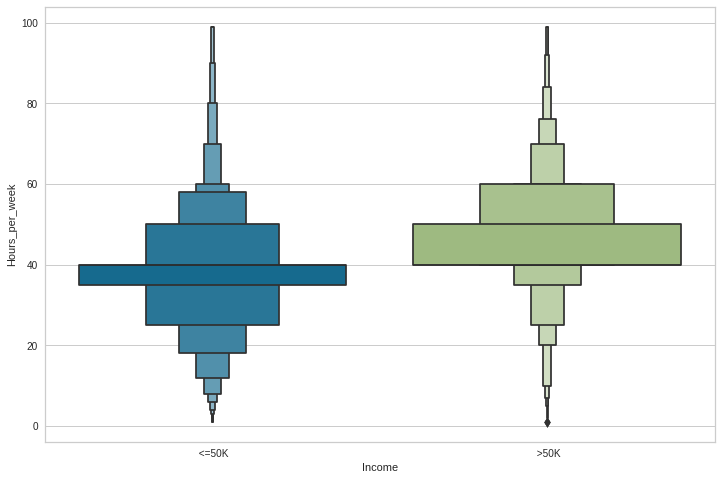

In [ ]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='Income',y='Hours_per_week',data=data)

*people earning >50k income work mean hours per week greater than tose earning
<50k whilw peoplw from both the categories work from min to max hours per week*

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

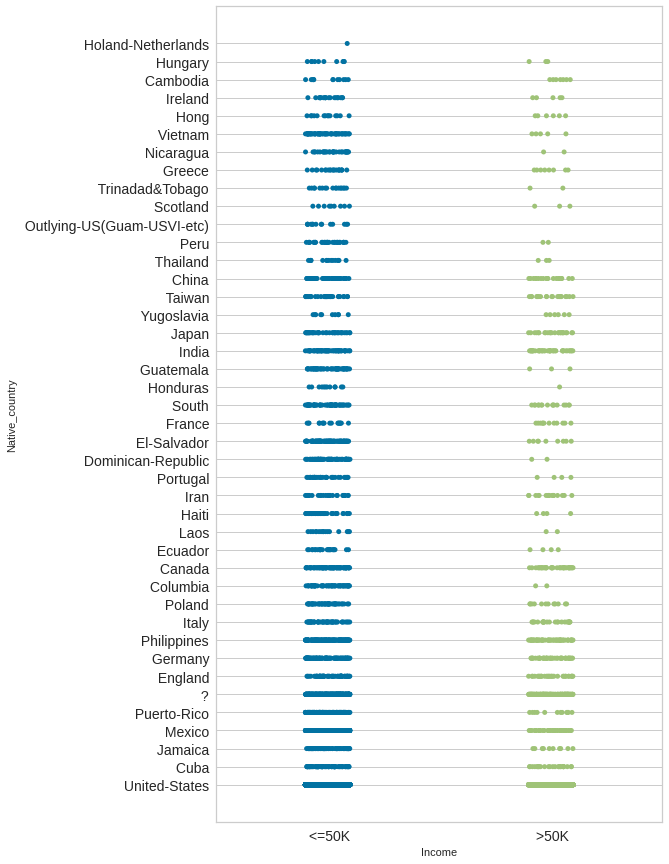

In [ ]:
plt.figure(figsize=(8,15))
sns.stripplot(x='Income',y='Native_country',data=data)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

*the plot shows people belonging to different contries have less chances of earning>50k which is wrong,this is because np.of individuals belonging from other countries other than U.S are very low but it is to be noticed that there are more people in the category <50k than >50k*

In [ ]:
col3=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income','Education_num']

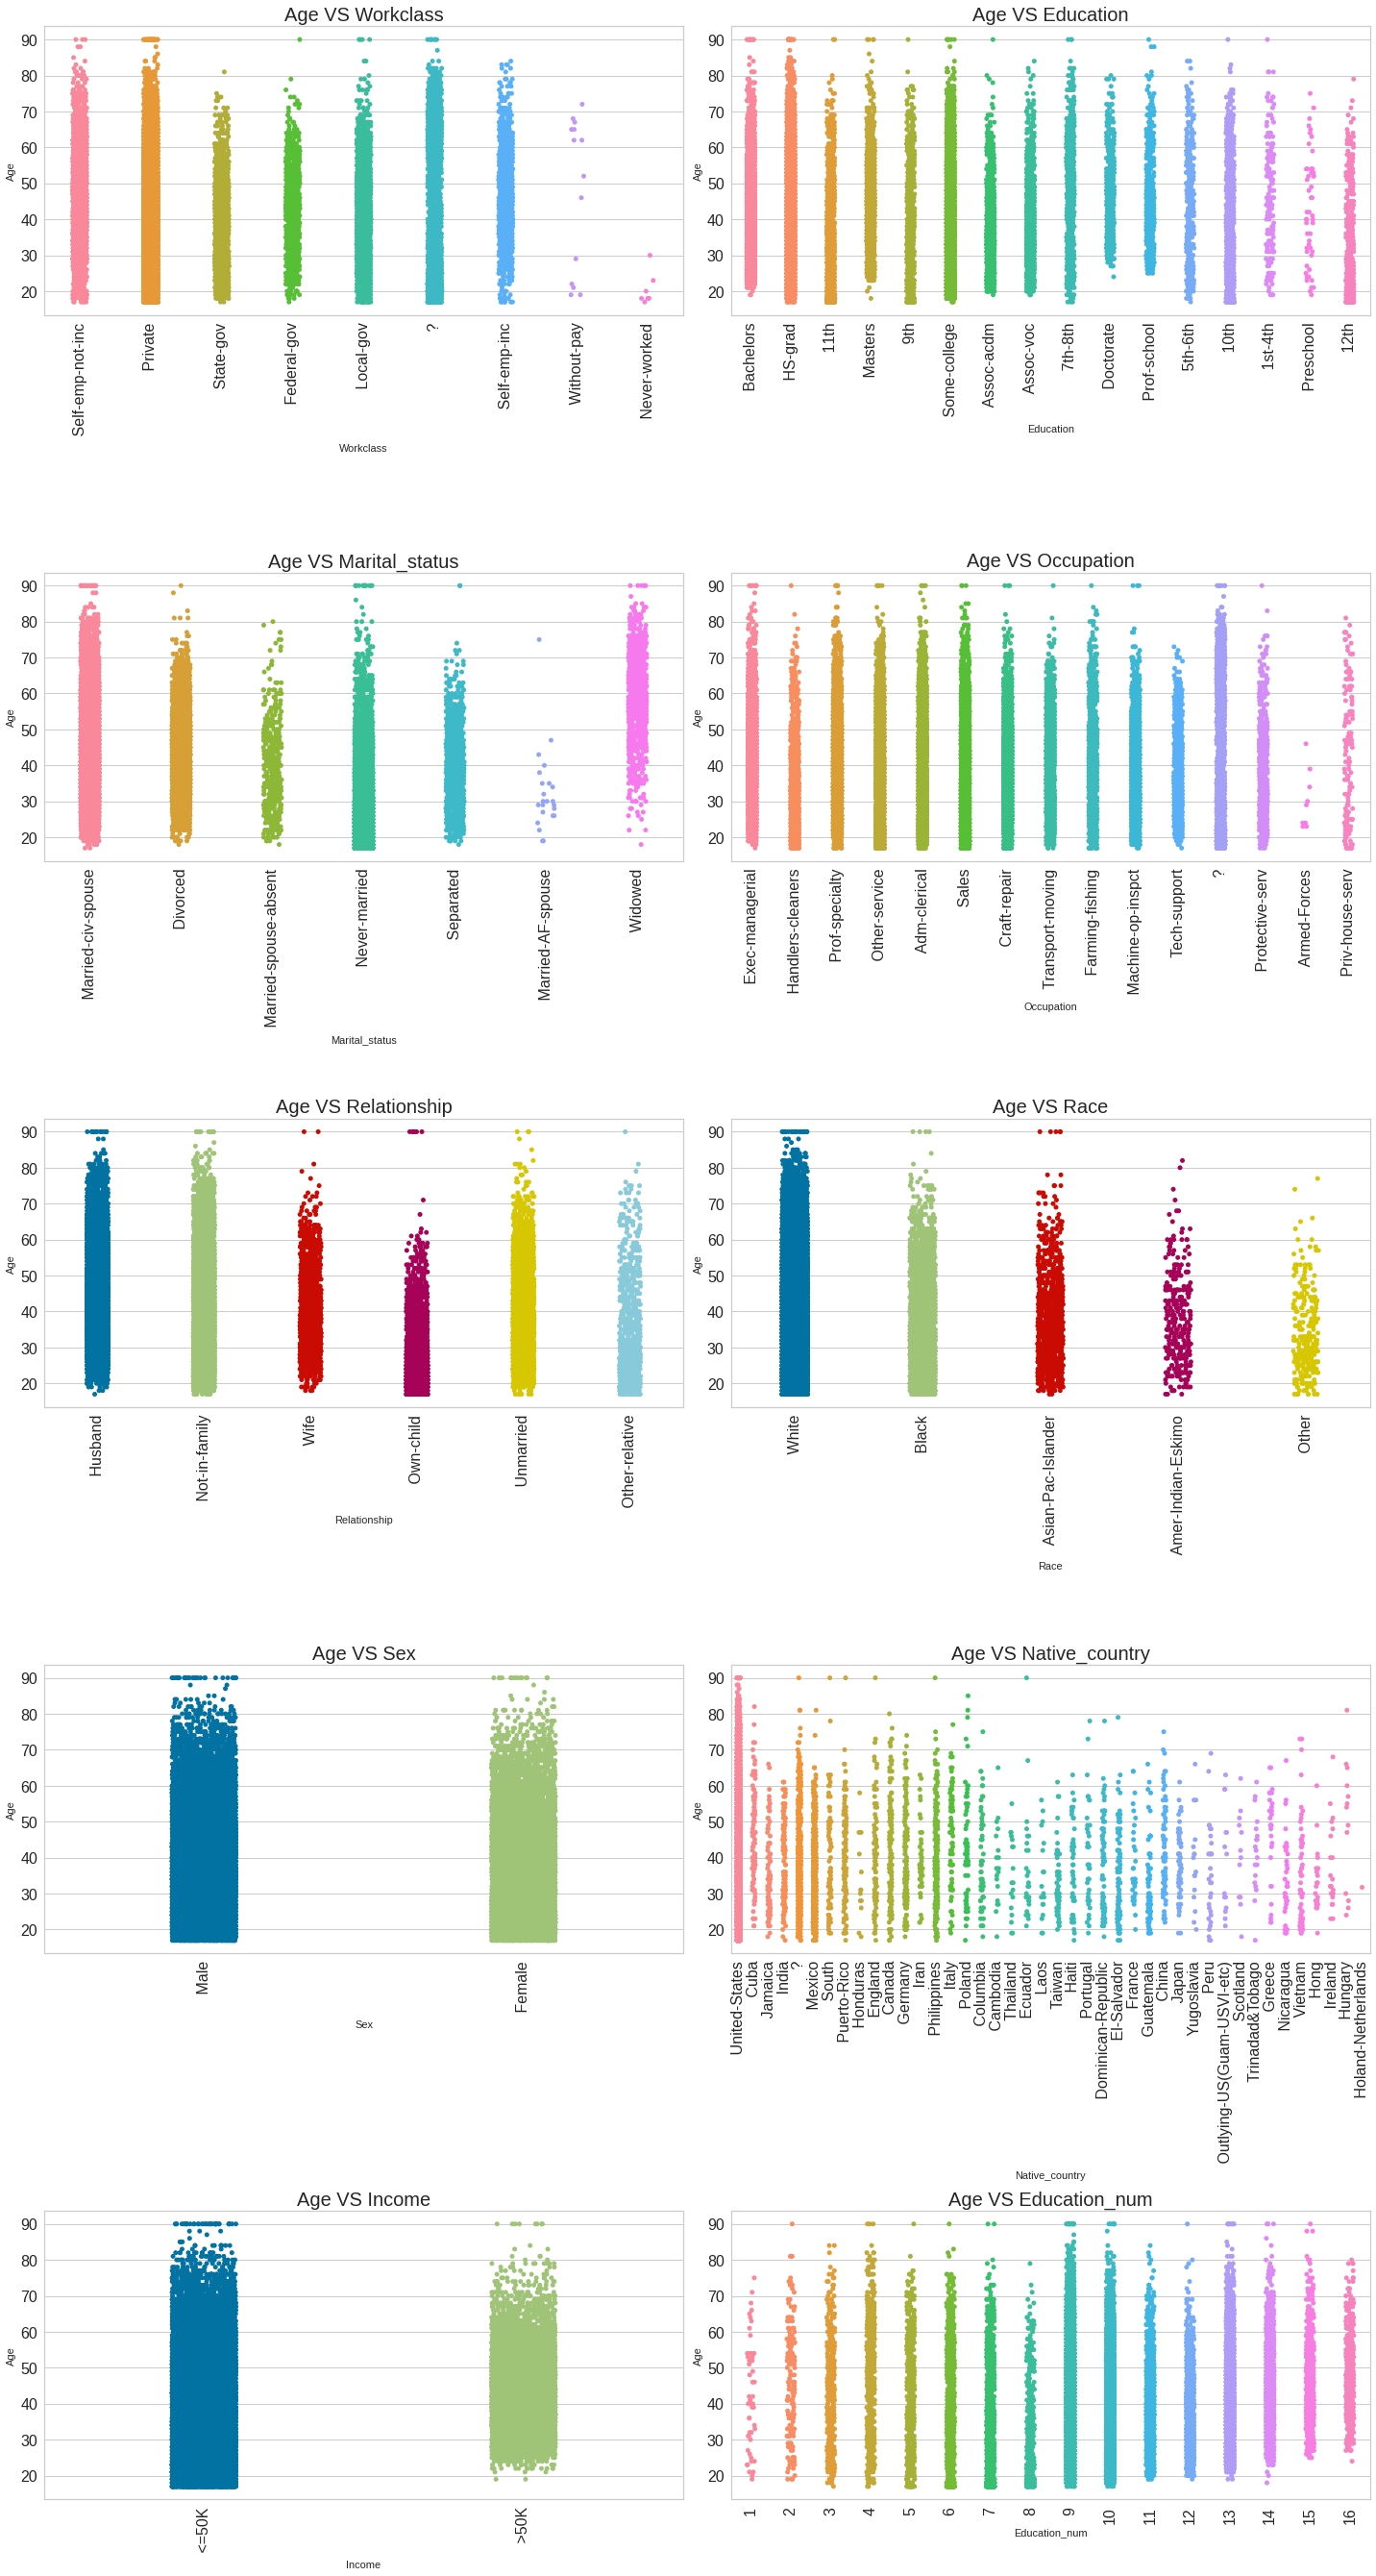

In [ ]:
plt.figure(figsize=(20,60))
for i in range(len(col3)):
  plt.subplot(8,2,i+1)
  sns.stripplot(y=data['Age'],x=data[col3[i]])
  plt.title(f"Age VS {col3[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

#Obseravtion

Individuals working in the gov. sector have almost age 70 to 80 with few outliers which must be the retirement age for them.

there are no individual who do not work after age of 30. 

there are no individuals of age >70 belonging to the pre school education category while doctorates and professors appers from late 20's as they have to study for more years to get to that level of education.

same is the case with education num, as the education number increase age also in increased. 

there are no people after the age of 50 in the married to armed forced category with just a few outliers.

Windowed category has seen icrease as the age seems to increase there are very few  widow at early age 

there are more no. of working men at higher age than women

there are very few people belonging from other countries with high age

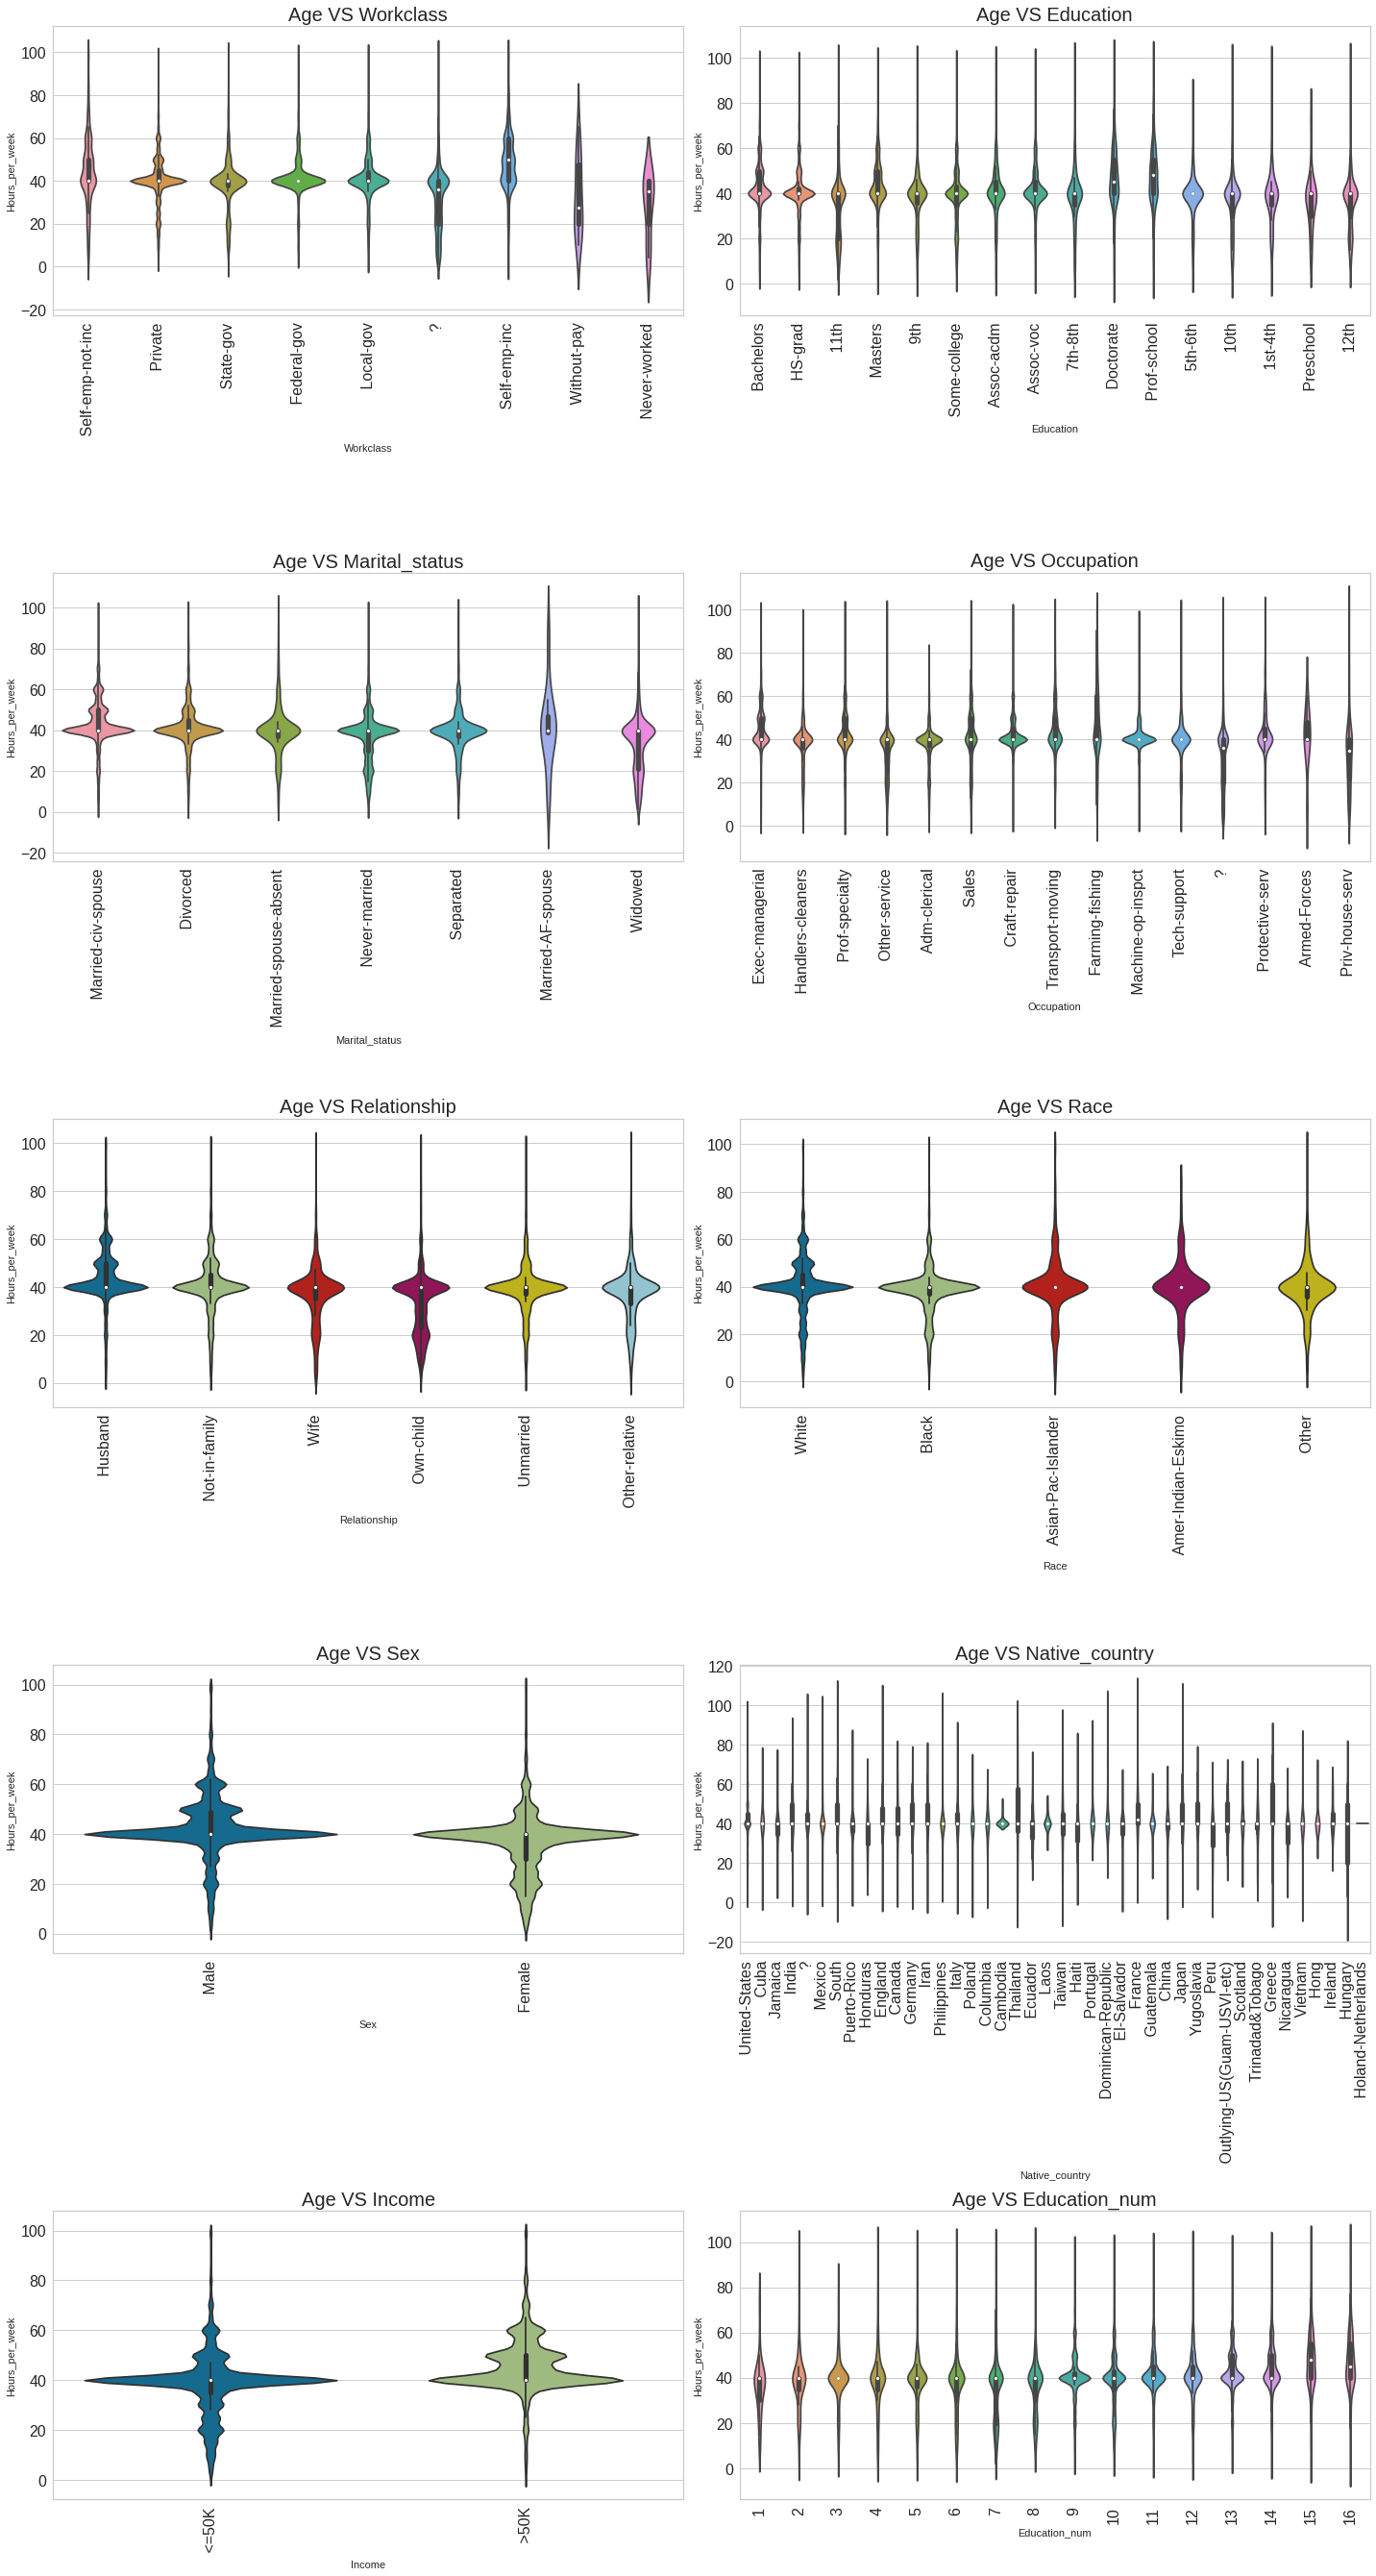

In [ ]:
plt.figure(figsize=(20,60))
for i in range(len(col3)):
  plt.subplot(8,2,i+1)
  sns.violinplot(y=data['Hours_per_week'],x=data[col3[i]])
  plt.title(f"Age VS {col3[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

#Obseravtion
Govt Employees do not work more than 80 hours a week that also with rare cases

it is been seen that people with less education work more no. hours of the week which is logical

no armed force person works more than 60 hours a week while farmers and transport movers has working hours mean high than other occupation

More no. of individuals who have relationship as own child have high density for working only 20 hours a week.

female works for less no. of hours as compare to mens

From relation ship people who are husband work more as compare to others and who owned child they work less as compare to other

From Race white people work more as comapre to other

From education people who are prof. and are doing doctorate work more no.of hours

In [ ]:
data0=data.groupby(['Age',"Income"]).apply(lambda x:x['Hours_per_week'].count()).reset_index(name='Hours')

Text(0.5, 1.0, 'Income VS Work Of Hours')

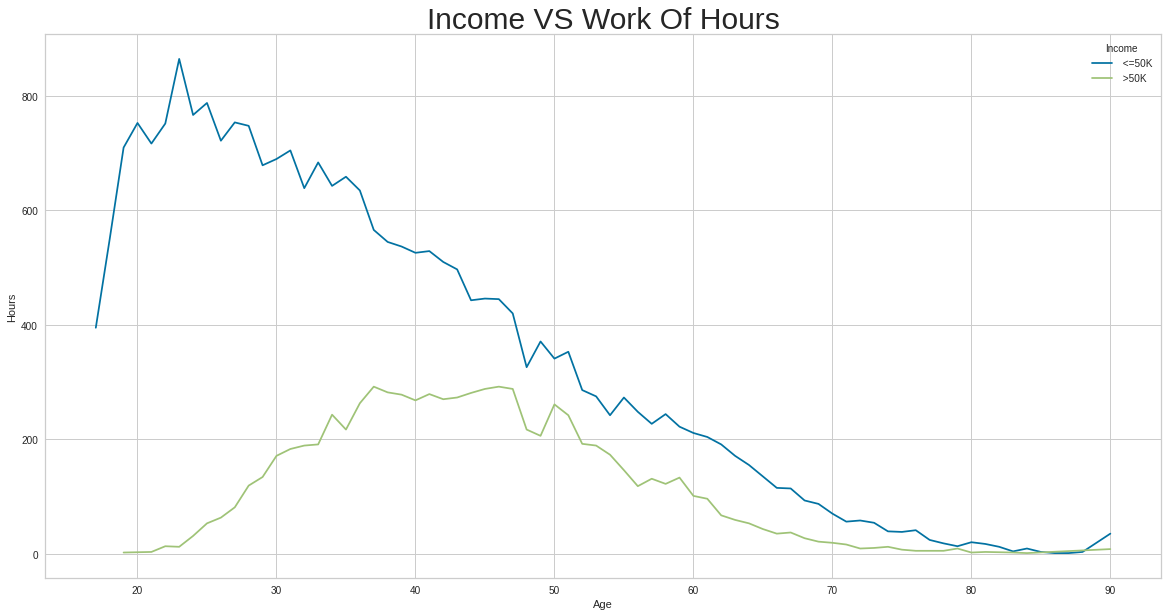

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='Hours',data=data0,hue='Income')
plt.title("Income VS Work Of Hours",fontsize=30)

People who get salary <50k they work more and people who get salary >50k they work less as comapre to other

Text(0.5, 1.0, 'Income Vs Age')

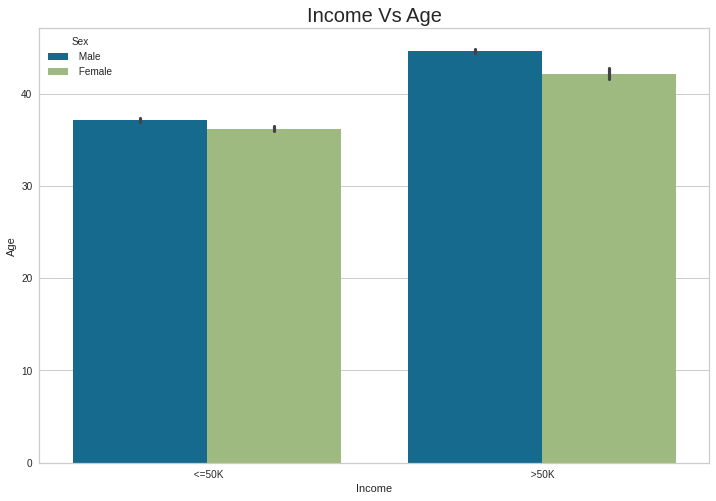

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Income',y='Age',data=data,hue='Sex')
plt.title("Income Vs Age",fontsize=20)

As the age increase people paid more but male paid more always as compare to females

<Figure size 864x576 with 0 Axes>

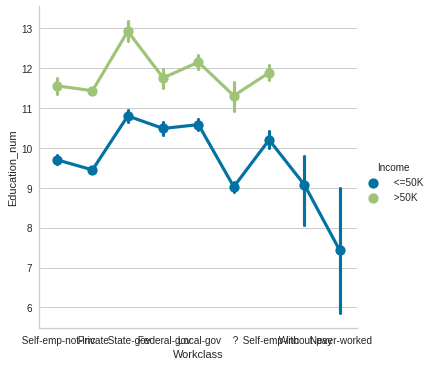

In [ ]:
plt.figure(figsize=(12,8))
sns.factorplot(x='Workclass',y='Education_num',hue='Income',data=data)

#Observation
Some people belonging to a particular workclass might have less education and some workclass might require more education level but no matter wheather workcalss,people in the same workclass,if they have higher education level they earn more. it is also to be noticed that there is no person from without pay and never worked workclass category who earn more than 50k which is logical

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

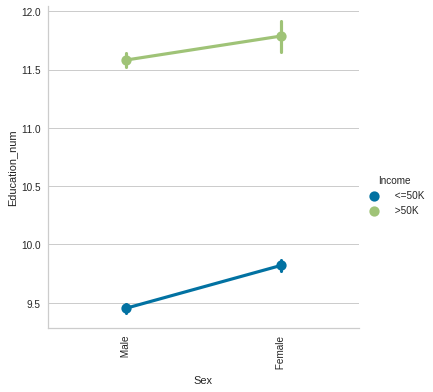

In [ ]:
sns.factorplot(x='Sex',y='Education_num',data=data,hue='Income')
plt.xticks(rotation=90)

#Observation
Female with higher education level earn equal to men having less education level than them irrespective of any income category they fall

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

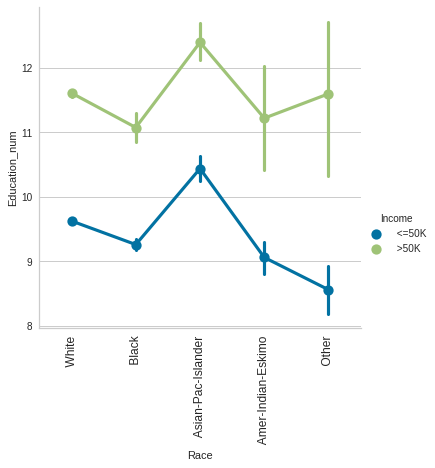

In [ ]:
sns.factorplot(x='Race',y='Education_num',hue='Income',data=data)
plt.xticks(rotation=90,fontsize=12)

#Obseravtion

Asian pacific race have comparatively more education than the fellows who earn same as much as they do,belonding to other races.Indians and some other races earns >50k with lowest education level

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

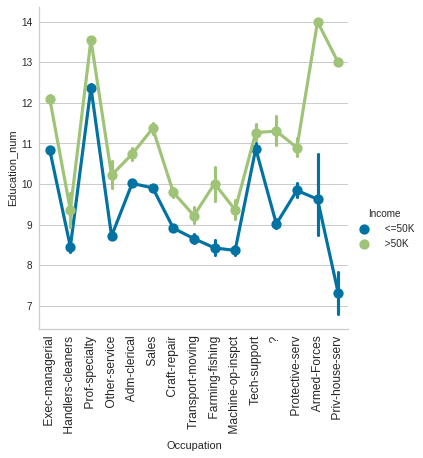

In [ ]:
sns.factorplot(x='Occupation',y='Education_num',hue="Income",data=data)
plt.xticks(rotation=90,fontsize=12)

#Obseravtion

People with highest education level belong to armed forces,but people with even education level quite low, who belong to handlers cleaners,transport maoving occupation earn as much as they do. Same is the case with prof speciality.occupation of private house service who earn >50k and <50k have the highest education level different while prof speciality have the minimum difference

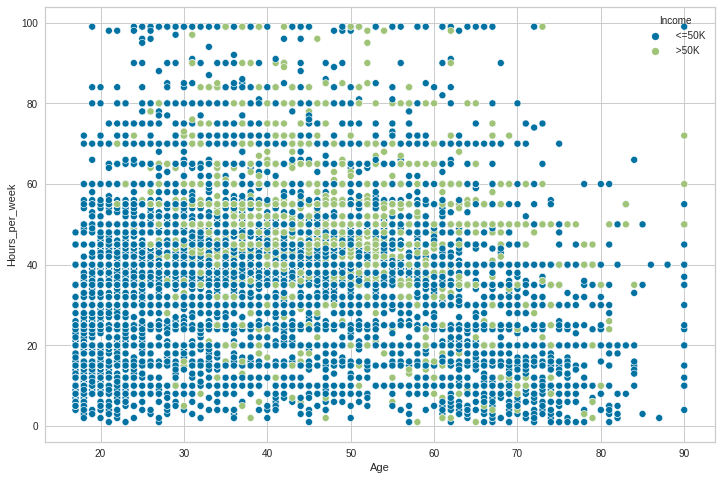

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='Hours_per_week',data=data,hue='Income')

#Obseravtion

From the plot between age,Hours per week and income,we observe that a person need to be >30 to be earning more than 50k, else needs to work at least 50 hours per week to earn >50k

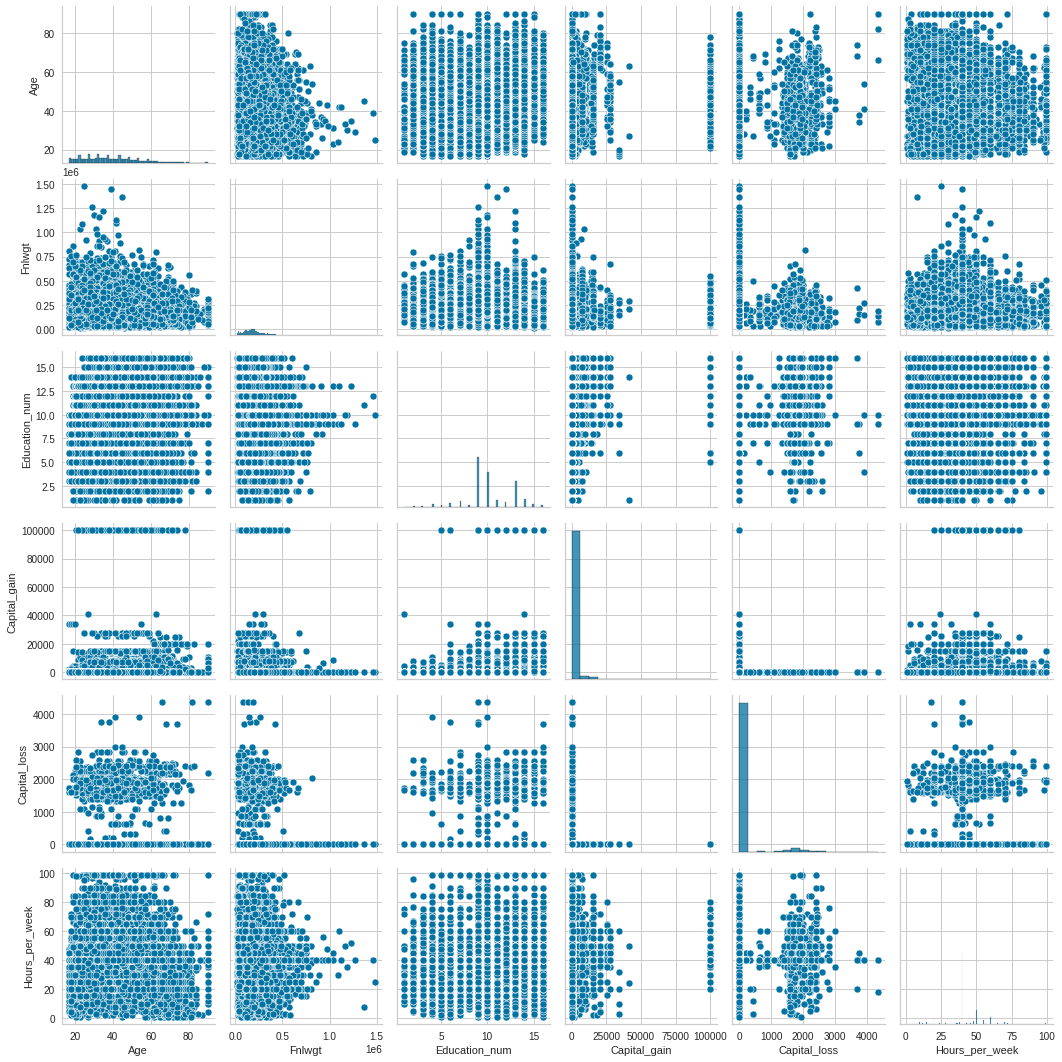

In [ ]:
sns.pairplot(data)

In [ ]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Education': 16,
 'Income': 2,
 'Marital_status': 7,
 'Native_country': 42,
 'Occupation': 15,
 'Race': 5,
 'Relationship': 6,
 'Sex': 2,
 'Workclass': 9}

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,power_transform

**I will use ordinalencoder because every column except native_country are in order**

In [ ]:
Oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=Oe.fit_transform(df[column])
  return df

In [ ]:
data=ordinal_encoder(data,['Education','Income','Marital_status','Occupation','Race','Relationship','Sex','Workclass'])

**Using labelencoder because unique values are only 42 not using onehot because it will increase the dimension size and even for model building more time and computation power will be required**

In [ ]:
def preprocessing(df):
  df=df.copy()
  le=LabelEncoder()
  df['Native_country']=le.fit_transform(df['Native_country'])
  X=df.drop('Income',axis=1)
  y=df['Income']
  return X,y

In [ ]:
X,y=preprocessing(data)

In [ ]:
X

Age  Workclass  Fnlwgt  ...  Capital_loss  Hours_per_week  Native_country
0       50        6.0   83311  ...             0              13              39
1       38        4.0  215646  ...             0              40              39
2       53        4.0  234721  ...             0              40              39
3       28        4.0  338409  ...             0              40               5
4       37        4.0  284582  ...             0              40              39
...    ...        ...     ...  ...           ...             ...             ...
32555   27        4.0  257302  ...             0              38              39
32556   40        4.0  154374  ...             0              40              39
32557   58        4.0  151910  ...             0              40              39
32558   22        4.0  201490  ...             0              20              39
32559   52        5.0  287927  ...             0              40              39

[32560 rows x 14 columns]

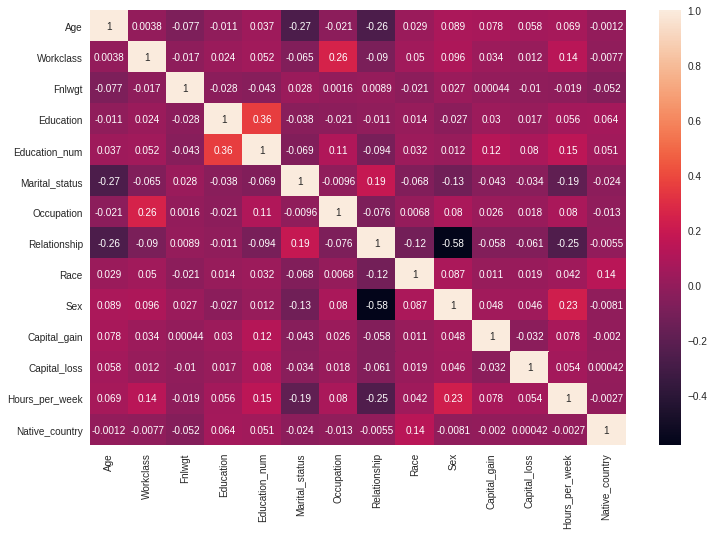

In [ ]:
X_corr=X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)

*Correlation is seems to be good like education having good +ve correlation and relationship and sex having -ve correlation and rest of the columns are also having correlation but at low level*

In [ ]:
x=X

#Checking Outliers

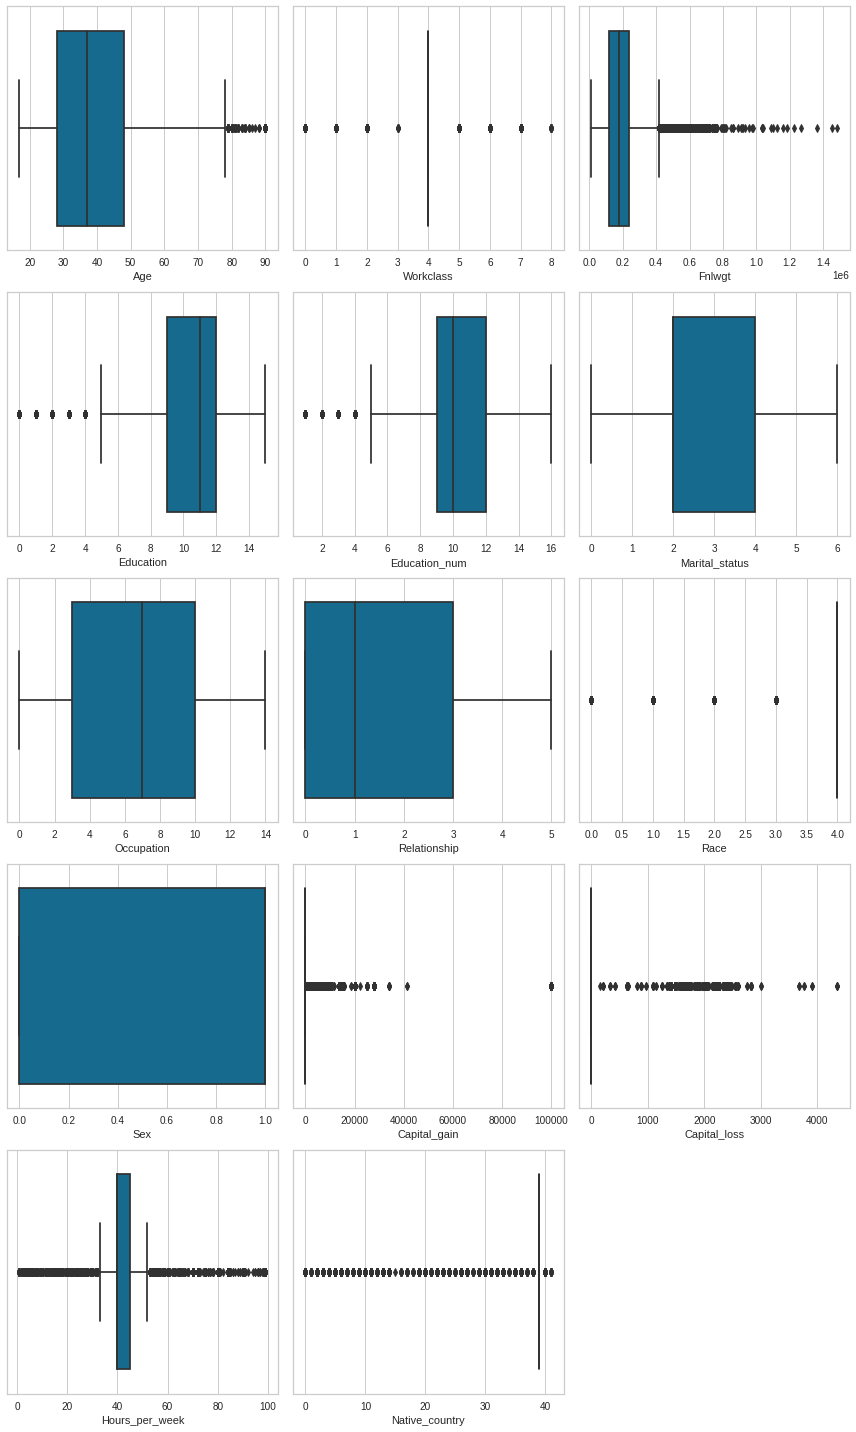

In [ ]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

*There are many outliers lets remove them*

**Here i will replace the outliers with percentile so we dont loose data**

In [ ]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

#After removing Outliers

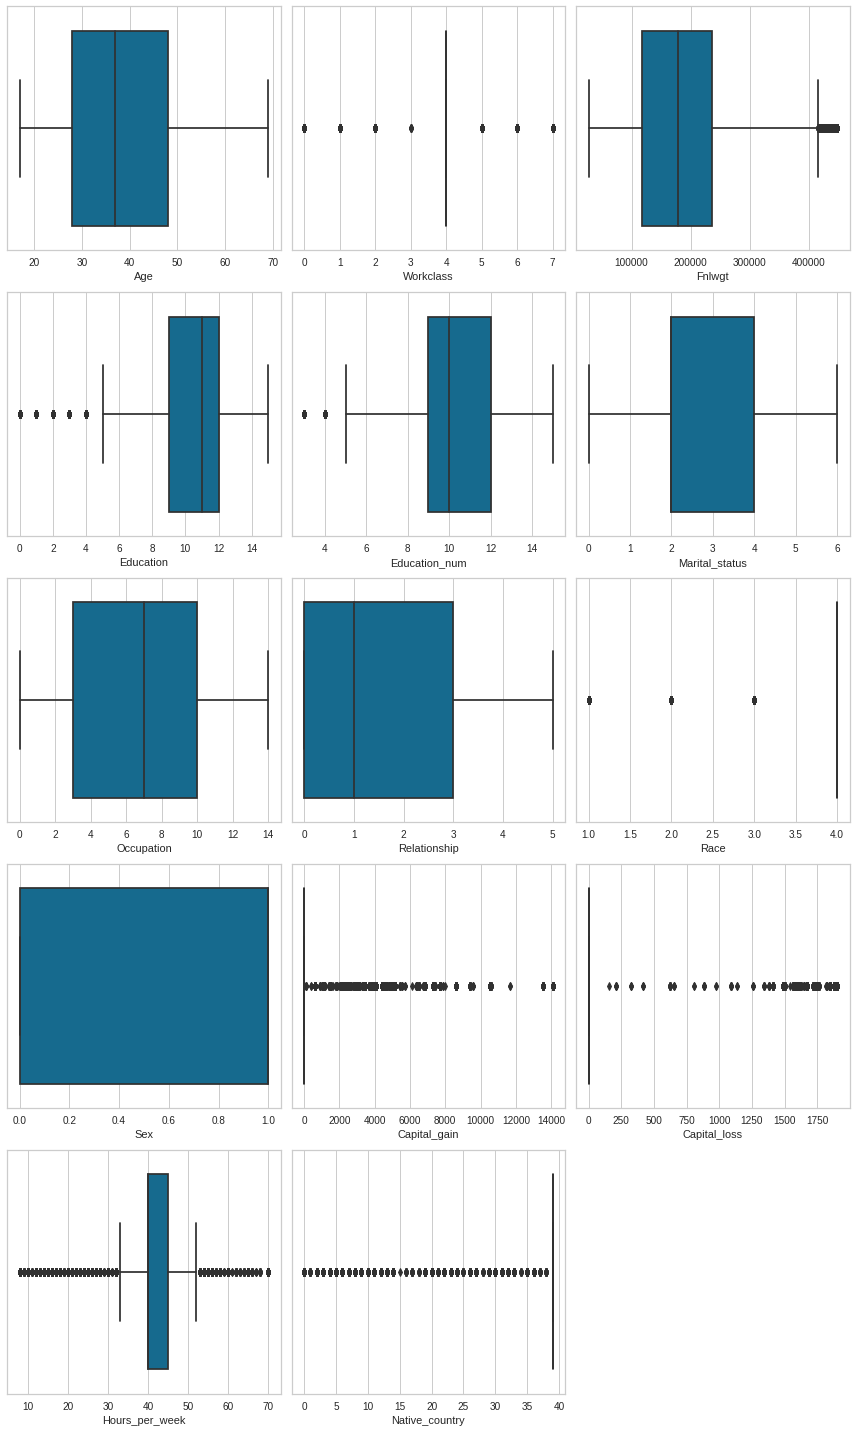

In [ ]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

*as we can see many outliers have been removed*

#Using Smote to balance the data as we have imbalanced data

In [ ]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Income'])

*Seeing the difference before and after balancing data*

Text(0.5, 1.0, 'Balanced data')

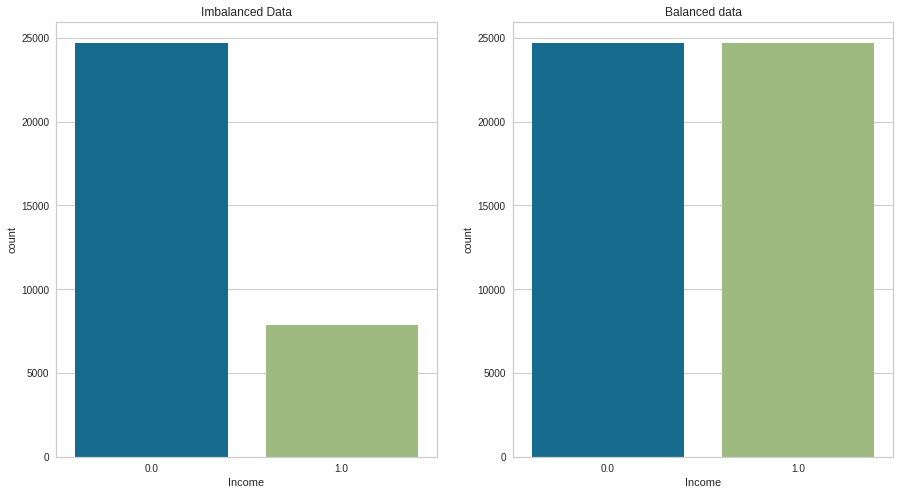

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data['Income'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Income'])
plt.title("Balanced data")

*Shape of data before and after balancing*

In [ ]:
print(data.shape)
print(X_new.shape)

(32560, 15)
(49438, 14)


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold

#Checking skewness

In [ ]:
X.skew()

Age               0.418990
Workclass        -0.758618
Fnlwgt            0.649592
Education        -0.934063
Education_num    -0.302045
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.273252
Sex              -0.719244
Capital_gain      4.455096
Capital_loss      4.394450
Hours_per_week   -0.237606
Native_country   -3.658844
dtype: float64

**Removing Skewness**

In [ ]:
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

#Checking skewness after removal

In [ ]:
X_new.skew()

Age              -0.043632
Workclass         0.084600
Fnlwgt           -0.031511
Education        -0.208042
Education_num    -0.037064
Marital_status    0.004875
Occupation       -0.177783
Relationship      0.290579
Race             -2.003784
Sex              -0.962074
Capital_gain      2.247692
Capital_loss      3.547154
Hours_per_week    0.117186
Native_country   -2.577562
dtype: float64

#Feature Scaling

In [ ]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
!pip install scikit-plot
import scikitplot as skplt
from lightgbm import LGBMClassifier

#Training multiple Models

In [ ]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier(),
    "LGBMClassifier":LGBMClassifier()
}

*I will use stratifiedfold because for classification problem it select the data equally from both classes*

*************************************************** LogisticRegression ************************************************************


Accuracy_Score 0.7824298813376483


SCORE 0.7824298813376483


Confusion metrics


[[5691 1718]
 [1509 5914]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      7409
         1.0       0.77      0.80      0.79      7423

    accuracy                           0.78     14832
   macro avg       0.78      0.78      0.78     14832
weighted avg       0.78      0.78      0.78     14832

Cross_Val_Score 0.7795016943893177


ROC AUC CURVE
MODEL LEARNING CURVE


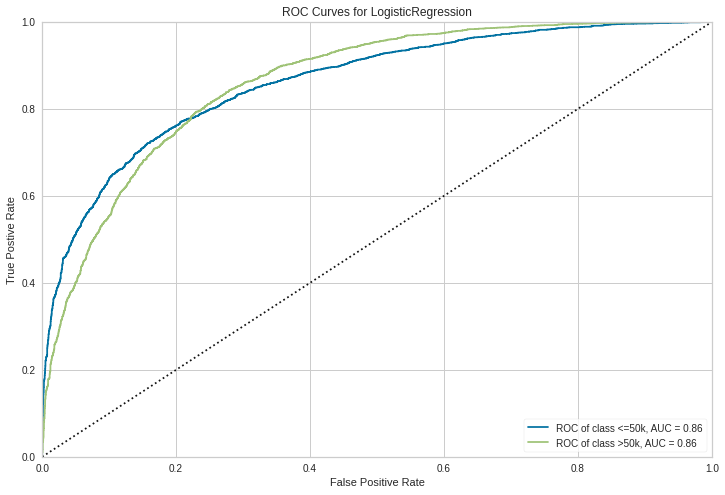

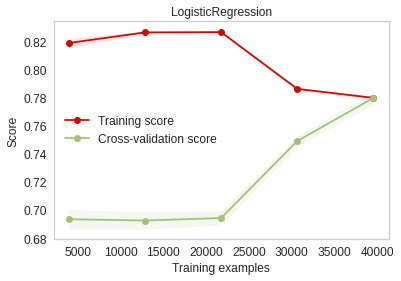

*************************************************** DecisionTreeClassifier ************************************************************


Accuracy_Score 0.8627292340884574


SCORE 0.8627292340884574


Confusion metrics


[[6357 1052]
 [ 984 6439]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      7409
         1.0       0.86      0.87      0.86      7423

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832

Cross_Val_Score 0.8630203234249281


ROC AUC CURVE
MODEL LEARNING CURVE


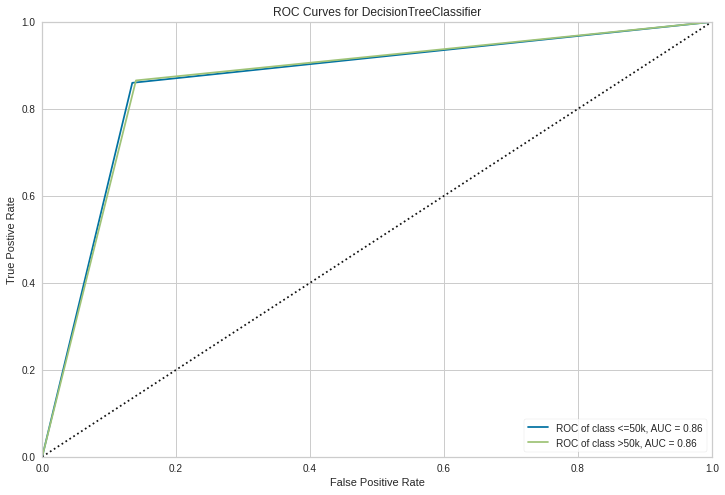

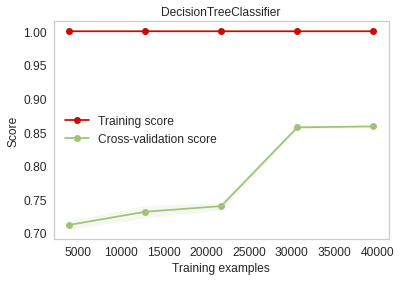

*************************************************** ExtraTreesClassifier ************************************************************


Accuracy_Score 0.8966423948220065


SCORE 0.8966423948220065


Confusion metrics


[[6674  735]
 [ 798 6625]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      7409
         1.0       0.90      0.89      0.90      7423

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

Cross_Val_Score 0.8959100558806423


ROC AUC CURVE
MODEL LEARNING CURVE


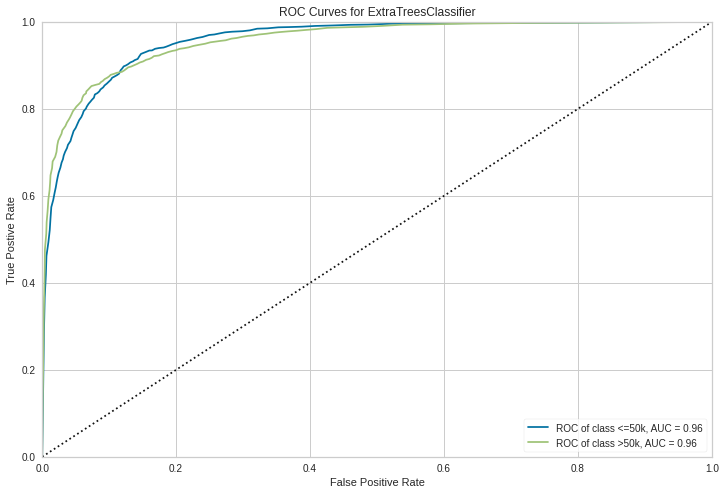

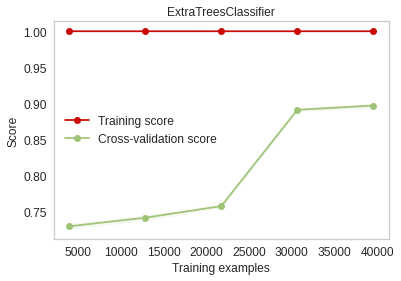

*************************************************** RandomForestClassifier ************************************************************


Accuracy_Score 0.9006202804746494


SCORE 0.9006202804746494


Confusion metrics


[[6762  647]
 [ 827 6596]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      7409
         1.0       0.91      0.89      0.90      7423

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

Cross_Val_Score 0.8989037409130948


ROC AUC CURVE
MODEL LEARNING CURVE


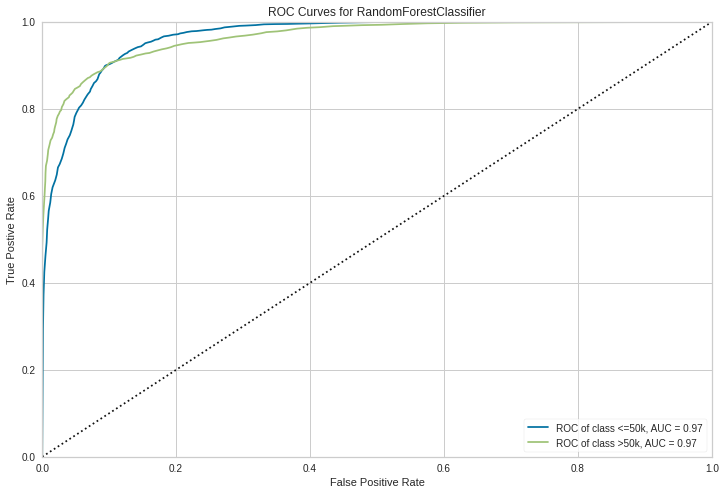

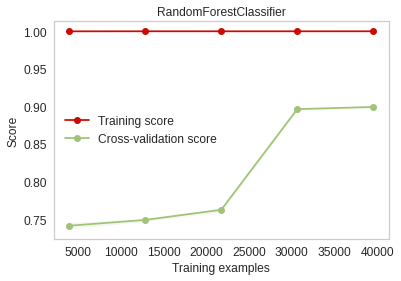

*************************************************** XGBClassifier ************************************************************


Accuracy_Score 0.9105312837108953


SCORE 0.9105312837108953


Confusion metrics


[[6871  538]
 [ 789 6634]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      7409
         1.0       0.92      0.89      0.91      7423

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832

Cross_Val_Score 0.9120109114056802


ROC AUC CURVE
MODEL LEARNING CURVE


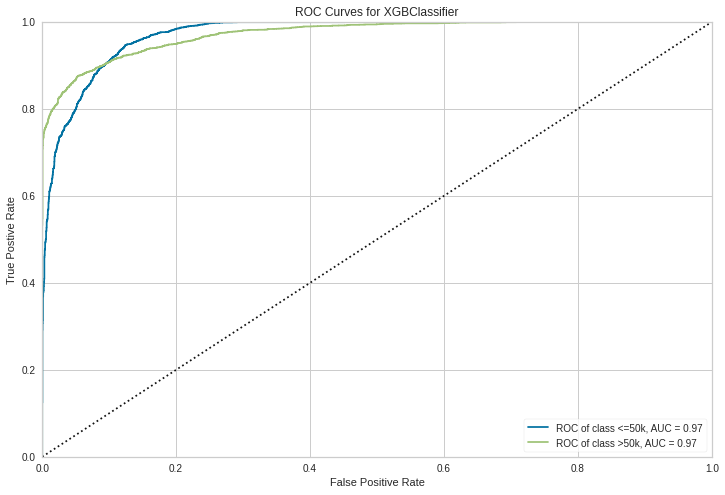

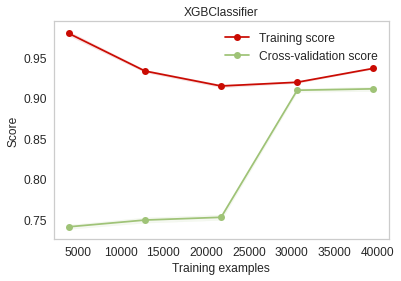

*************************************************** LGBMClassifier ************************************************************


Accuracy_Score 0.9150485436893204


SCORE 0.9150485436893204


Confusion metrics


[[6908  501]
 [ 759 6664]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      7409
         1.0       0.93      0.90      0.91      7423

    accuracy                           0.92     14832
   macro avg       0.92      0.92      0.92     14832
weighted avg       0.92      0.92      0.92     14832

Cross_Val_Score 0.9121120706867867


ROC AUC CURVE
MODEL LEARNING CURVE


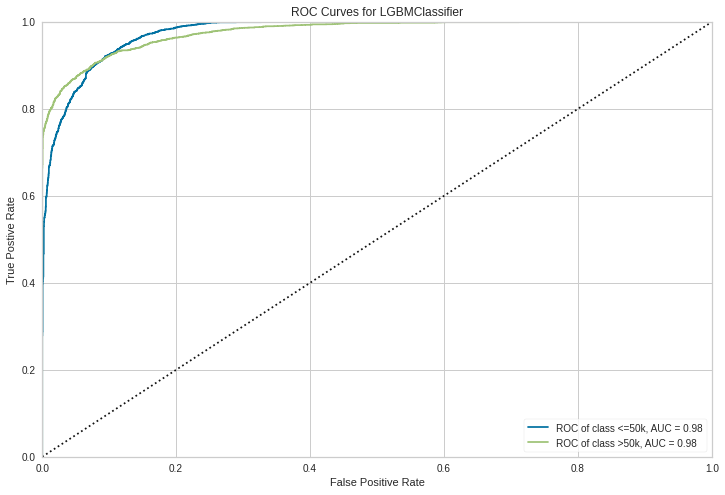

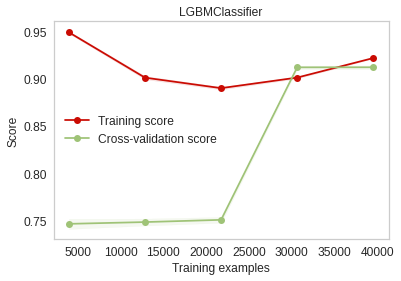

In [ ]:
skf=StratifiedKFold(n_splits=5,shuffle=True)
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  print("ROC AUC CURVE")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

#Lightgbm is giving me good metrixs so i will use it only for hyperparameter

In [ ]:
LGB=LGBMClassifier()
LGB.fit(X_train,y_train)

LGBMClassifier()

In [ ]:
y_pred=LGB.predict(X_test)
accuracy_score(y_test,y_pred)

0.9150485436893204

In [ ]:
LGB.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

#HyperParameter Tuning

*I Am using here less parameters because dataset is big and because of less computation power if i will use more params my system will carsh*

In [ ]:
param={
    'boosting_type': ['gbdt','dart','gross','rf'],
    'n_estimators':[100,500],
    'learning_rate':[0.1,0.01,0.001],
    'importance_type': ['split','gain'],
}

In [ ]:
GRID=GridSearchCV(estimator=LGB,scoring='accuracy',param_grid=param,n_jobs=-1,cv=skf)

In [ ]:
GRID.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'gross', 'rf'],
                         'importance_type': ['split', 'gain'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500]},
             scoring='accuracy')

In [ ]:
GRID.best_score_

0.913184060793111

In [ ]:
GRID.best_params_

{'boosting_type': 'dart',
 'importance_type': 'split',
 'learning_rate': 0.1,
 'n_estimators': 500}

In [ ]:
LGBM=LGBMClassifier(boosting_type= 'dart',
 importance_type= 'split',
 learning_rate= 0.1,
 n_estimators= 500)

#Final Model Cross Val Score

In [ ]:
sk=Stratified

In [ ]:
new_csv=cross_val_score(LGBM,X_new,y_new,cv=skf).mean()
new_csv

0.912698785515811

In [ ]:
LGBM.fit(X_train,y_train)
y_p=LGBM.predict(X_test)
print(accuracy_score(y_test,y_p))

0.8676289926289926


#Final Model Roc_Auc Curve

In [ ]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(LGBM,X_train,y_train,X_test=X_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(LGBM,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

#Final Model Matrix

In [ ]:
print("Confusion matrics")
print('\n')
print(confusion_matrix(y_test,y_p))
print("Classifiaction_report")
print('\n')
print(classification_report(y_test,y_p))
print("Accuracy Score",accuracy_score(y_test,y_p))

Confusion matrics


[[6924  471]
 [ 822 1551]]
Classifiaction_report


              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      7395
         1.0       0.77      0.65      0.71      2373

    accuracy                           0.87      9768
   macro avg       0.83      0.79      0.81      9768
weighted avg       0.86      0.87      0.86      9768

Accuracy Score 0.8676289926289926


In [ ]:
import joblib
joblib.dump(GRID,"CensusClassifier.obj")

In [ ]:
m=RandomForestClassifier(max_features='log2', n_estimators=500)

In [ ]:
m.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=500)

In [ ]:
y_1=m.predict(X_test)

In [ ]:
print("Confusion matrics")
print('\n')
print(confusion_matrix(y_test,y_1))
print("Classifiaction_report")
print('\n')
print(classification_report(y_test,y_1))
print("Accuracy Score",accuracy_score(y_test,y_1))

Confusion matrics


[[6871  524]
 [ 890 1483]]
Classifiaction_report


              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      7395
         1.0       0.74      0.62      0.68      2373

    accuracy                           0.86      9768
   macro avg       0.81      0.78      0.79      9768
weighted avg       0.85      0.86      0.85      9768

Accuracy Score 0.8552416052416052
